# Demond Forecasts for HERON datasets

## HERON HQ Parking

### Load data

In [2]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error


In [3]:
ts60 = pd.read_csv('EVB-P1840070_Heron_HQ_Parking_mean_demand_20210102_to_20211013_60min.csv', index_col=0, parse_dates=True)


ts60.shape

(6817, 1)

In [4]:
features60 = pd.read_csv('EVB-P1840070_Heron_HQ_Parking_mean_demand_20210102_to_20211013_60min_time_covariates.csv', index_col=0, parse_dates=True)

In [5]:
features60.shape

(6817, 11)

In [6]:
df60 = ts60.join(features60)

In [7]:
df60.head()
df60.tail()

,Total Demand (kw),year,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos,dayofweek,dayofyear,week,holidays
2021-10-12 20:00:00,7.251799e-02,2021.0,-0.866025,0.5,0.0,1.0,-0.866025,0.500000,1.0,285.0,41.0,0.0
2021-10-12 21:00:00,2.273737e-13,2021.0,-0.866025,0.5,0.0,1.0,-0.707107,0.707107,1.0,285.0,41.0,0.0
2021-10-12 22:00:00,2.273737e-13,2021.0,-0.866025,0.5,0.0,1.0,-0.500000,0.866025,1.0,285.0,41.0,0.0
2021-10-12 23:00:00,2.273737e-13,2021.0,-0.866025,0.5,0.0,1.0,-0.258819,0.965926,1.0,285.0,41.0,0.0
2021-10-13 00:00:00,-6.809524e-02,2021.0,-0.866025,0.5,0.0,1.0,0.000000,1.000000,2.0,286.0,41.0,0.0


In [8]:
df60['prev_demand'] = df60['Total Demand (kw)'].shift(1)
df60['prev_demand2'] = df60['Total Demand (kw)'].shift(2)
df60['prev_demand3'] = df60['Total Demand (kw)'].shift(3)
df60['prev_demand4'] = df60['Total Demand (kw)'].shift(4)

df60['yesterday_demand'] = df60['Total Demand (kw)'].shift(24)

df60 = df60.dropna()
df60.head(25)

,Total Demand (kw),year,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos,dayofweek,dayofyear,week,holidays,prev_demand,prev_demand2,prev_demand3,prev_demand4,yesterday_demand
2021-01-03 00:00:00,0.0,2021.0,0.5,0.866025,0.0,1.0,0.000000e+00,1.000000e+00,6.0,3.0,53.0,0.0,0.0,0.0,0.0,0.103665,0.000000
2021-01-03 01:00:00,0.0,2021.0,0.5,0.866025,0.0,1.0,2.588190e-01,9.659258e-01,6.0,3.0,53.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2021-01-03 02:00:00,0.0,2021.0,0.5,0.866025,0.0,1.0,5.000000e-01,8.660254e-01,6.0,3.0,53.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2021-01-03 03:00:00,0.0,2021.0,0.5,0.866025,0.0,1.0,7.071068e-01,7.071068e-01,6.0,3.0,53.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2021-01-03 04:00:00,0.0,2021.0,0.5,0.866025,0.0,1.0,8.660254e-01,5.000000e-01,6.0,3.0,53.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2021-01-03 05:00:00,0.0,2021.0,0.5,0.866025,0.0,1.0,9.659258e-01,2.588190e-01,6.0,3.0,53.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2021-01-03 06:00:00,0.0,2021.0,0.5,0.866025,0.0,1.0,1.000000e+00,6.123234e-17,6.0,3.0,53.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2021-01-03 07:00:00,0.0,2021.0,0.5,0.866025,0.0,1.0,9.659258e-01,-2.588190e-01,6.0,3.0,53.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2021-01-03 08:00:00,0.0,2021.0,0.5,0.866025,0.0,1.0,8.660254e-01,-5.000000e-01,6.0,3.0,53.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2021-01-03 09:00:00,0.0,2021.0,0.5,0.866025,0.0,1.0,7.071068e-01,-7.071068e-01,6.0,3.0,53.0,0.0,0.0,0.0,0.0,0.000000,0.000000


 ### Regression models for demand forecasting

#### Split to train and test set with the last 12 days to constitute the test set

In [10]:
y = df60[['Total Demand (kw)']]
X = df60[['prev_demand', 'prev_demand2','prev_demand3', 'prev_demand4','month_sin', 'month_cos', 'day_sin', 'day_cos', 'hour_sin', 'hour_cos', 'dayofweek', 'dayofyear', 'holidays']]

In [12]:
X_train = X[:-(12*24)]
y_train = y[:-(12*24)]

X_test = X[-(12*24):]
y_test = y[-(12*24):]

#### Decision Tree Regression

In [13]:
tree_reg = tree.DecisionTreeRegressor()
tree_reg = tree_reg.fit(X_train, y_train)

y_train_pred_dec_tree = tree_reg.predict(X_train)
y_test_pred_dec_tree = tree_reg.predict(X_test)

In [17]:
MSE_train_dec_tree = mean_squared_error(y_train, y_train_pred_dec_tree)
MSE_test_dec_tree = mean_squared_error(y_test, y_test_pred_dec_tree)

# MAPE_train_dec_tree = mean_absolute_percentage_error(y_train, y_train_pred_dec_tree)
# MAPE_test_dec_tree = mean_absolute_percentage_error(y_test, y_test_pred_dec_tree)


print(MSE_test_dec_tree)

3.579947048495289


MSE naive: 0.7682674868541176
MSE: 3.579947048495289
RMSE: 1.8920747999207876


<Figure size 432x288 with 0 Axes>

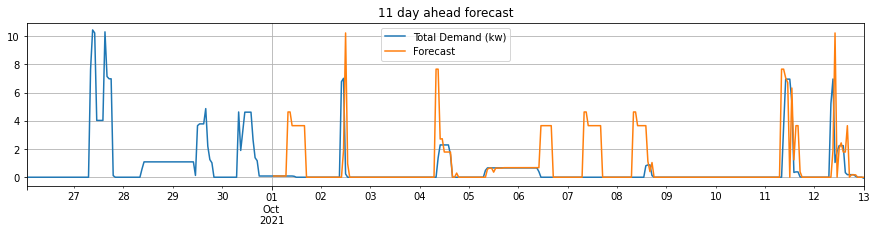

In [18]:
from sklearn.metrics import mean_squared_error as mse 
from sklearn.metrics import mean_absolute_percentage_error as mape
import numpy as np
import matplotlib.pyplot as plt


ground_truth_line = pd.concat([y_train[-5*24:], y_test])

naive_pred = [y_train.to_numpy().tolist()[-1]] + y_test.to_numpy().tolist()[:-1]
print("MSE naive:", mse(y_test, naive_pred))
print("MSE:", mse(y_test, y_test_pred_dec_tree))
print("RMSE:", np.sqrt(mse(y_test, y_test_pred_dec_tree)))

plt.figure()
plot = ground_truth_line.plot(figsize=(15, 3), label='Data', legend=True, title="11 day ahead forecast")
a = pd.Series(y_test_pred_dec_tree)
a.index = pd.Series(y_test['Total Demand (kw)']).index
a.plot(label='Forecast', legend=True)
plot.grid()
plt.show()

In [19]:
y_test['Total Demand (kw)'].to_numpy().shape

(288,)

#### SVM Baseline model

In [20]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

sv_regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
sv_regr.fit(X_train, y_train)

y_train_pred_svr = sv_regr.predict(X_train)
y_test_pred_svr = sv_regr.predict(X_test)

C:\Users\vkarakolis.EPU\Anaconda3\envs\veolia\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [21]:
MSE_test_svr = mean_squared_error(y_test, y_test_pred_svr)

# MAPE_test_svr = mean_absolute_percentage_error(y_test, y_test_pred_svr)


print(MSE_test_svr)

0.5803806575401735


MSE naive: 0.7682674868541176
MSE: 0.5803806575401735
RMSE: 0.7618271835135404


<Figure size 432x288 with 0 Axes>

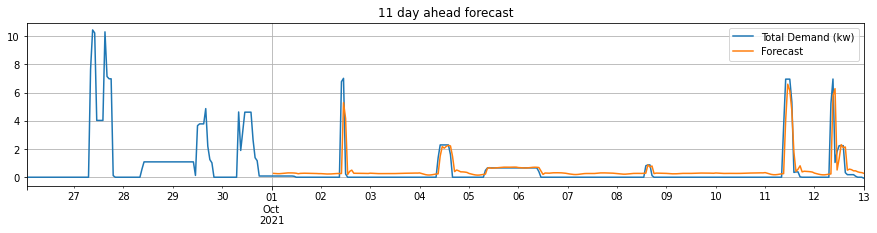

In [23]:
ground_truth_line = pd.concat([y_train[-5*24:], y_test])

naive_pred = [y_train.to_numpy().tolist()[-1]] + y_test.to_numpy().tolist()[:-1]
print("MSE naive:", mse(y_test, naive_pred))
# print("MAPE:", mape(y_test, y_test_pred_svr))
print("MSE:", mse(y_test, y_test_pred_svr))
print("RMSE:", np.sqrt(mse(y_test, y_test_pred_svr)))

plt.figure()
plot = ground_truth_line.plot(figsize=(15, 3), label='Data', legend=True, title="11 day ahead forecast")
a = pd.Series(y_test_pred_svr)
a.index = pd.Series(y_test['Total Demand (kw)']).index
a.plot(label='Forecast', legend=True)
plot.grid()
plt.show()

#### Random forest regression

In [24]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg = rf_reg.fit(X_train, y_train)

y_train_pred_rf = rf_reg.predict(X_train)
y_test_pred_rf = rf_reg.predict(X_test)

<ipython-input-24-156f1dc969f9>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg = rf_reg.fit(X_train, y_train)


In [25]:
MSE_train_rf = mean_squared_error(y_train, y_train_pred_rf)
MSE_test_rf = mean_squared_error(y_test, y_test_pred_rf)

# MAPE_train_rf = mean_absolute_percentage_error(y_train, y_train_pred_rf)
# MAPE_test_rf = mean_absolute_percentage_error(y_test, y_test_pred_rf)


print(MSE_test_rf)

1.9318205284008114


MSE naive: 0.7682674868541176
MSE: 1.9318205284008114
RMSE: 1.389899467012205


<Figure size 432x288 with 0 Axes>

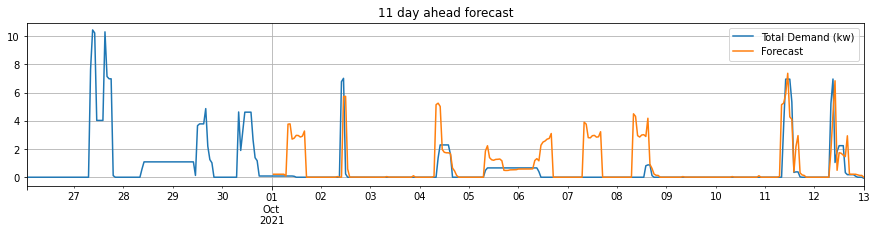

In [26]:
ground_truth_line = pd.concat([y_train[-5*24:], y_test])

naive_pred = [y_train.to_numpy().tolist()[-1]] + y_test.to_numpy().tolist()[:-1]
print("MSE naive:", mse(y_test, naive_pred))
print("MSE:", mse(y_test, y_test_pred_rf))
print("RMSE:", np.sqrt(mse(y_test, y_test_pred_rf)))

plt.figure()
plot = ground_truth_line.plot(figsize=(15, 3), label='Data', legend=True, title="11 day ahead forecast")
a = pd.Series(y_test_pred_rf)
a.index = pd.Series(y_test['Total Demand (kw)']).index
a.plot(label='Forecast', legend=True)
plot.grid()
plt.show()

### XGBoost

In [27]:
import xgboost

xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)

y_test_pred_xgb = xgb_reg.predict(X_test)

In [28]:
MSE_test_xgb = mean_squared_error(y_test, y_test_pred_xgb)

print(MSE_test_xgb)

2.4295601068814268


MSE naive: 0.7682674868541176
MSE: 2.4295601068814268
RMSE: 1.5587046246423428


<Figure size 432x288 with 0 Axes>

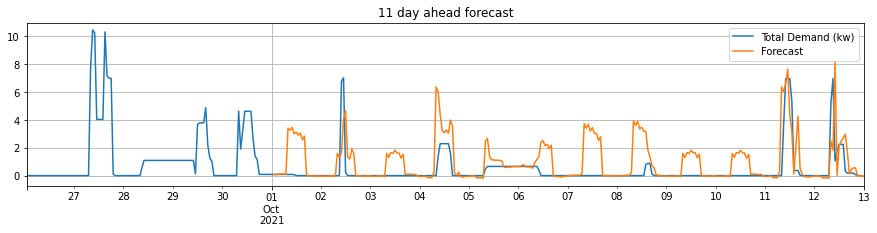

In [29]:
ground_truth_line = pd.concat([y_train[-5*24:], y_test])

naive_pred = [y_train.to_numpy().tolist()[-1]] + y_test.to_numpy().tolist()[:-1]
print("MSE naive:", mse(y_test, naive_pred))
print("MSE:", mse(y_test, y_test_pred_xgb))
print("RMSE:", np.sqrt(mse(y_test, y_test_pred_xgb)))

plt.figure()
plot = ground_truth_line.plot(figsize=(15, 3), label='Data', legend=True, title="11 day ahead forecast")
a = pd.Series(y_test_pred_xgb)
a.index = pd.Series(y_test['Total Demand (kw)']).index
a.plot(label='Forecast', legend=True)
plot.grid()
plt.show()